In [1]:
#https://www.kaggle.com/ark2393/titanic/titanic-survival-forecast-a-first-kaggle-submit

In [37]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm, tree, linear_model, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
#Load the data and get a feel
titanic_df = pd.read_csv("./train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [40]:
#missing values for Age Cabin & Embarked
print("Cabin value count: %d " % titanic_df["Cabin"].count())
print("Age value count: %d" % titanic_df["Age"].count())
print("Embarked value count: %d" % titanic_df["Embarked"].count())

Cabin value count: 204 
Age value count: 714
Embarked value count: 889


In [41]:
titanic_df.drop("Cabin", axis=1, inplace=True)
titanic_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [42]:
titanic_df["Embarked"].fillna("S", inplace=True)
titanic_df.dropna(inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Embarked       714 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.9+ KB


In [43]:
print("Name value count: %d " % titanic_df["Name"].value_counts().size)
print("Ticket value count: %d " % titanic_df["Ticket"].value_counts().size)
print("PassengerId value count: %d " % titanic_df["PassengerId"].value_counts().size)
print("Sex value count: %d " % titanic_df["Sex"].value_counts().size)
print("Embarked value count: %d " % titanic_df["Embarked"].value_counts().size)

Name value count: 714 
Ticket value count: 542 
PassengerId value count: 714 
Sex value count: 2 
Embarked value count: 3 


In [44]:
#Name, Ticket, PassengerId have very unique values - so drop them
titanic_df.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)
sex_labels = titanic_df["Sex"].unique()
embark_labels = titanic_df["Embarked"].unique()

In [45]:
le = preprocessing.LabelEncoder()

In [46]:
le.fit(titanic_df.Sex.values)
titanic_df["Sex"] = le.transform(titanic_df.Sex.values)
sex_labels = titanic_df["Sex"].unique()
sex_labelsE = le.inverse_transform(sex_labels)
le.fit(titanic_df.Embarked.values)
titanic_df["Embarked"] = le.transform(titanic_df.Embarked.values)
embark_labels = titanic_df["Embarked"].unique()
embark_labelsE = le.inverse_transform(embark_labels)

In [47]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


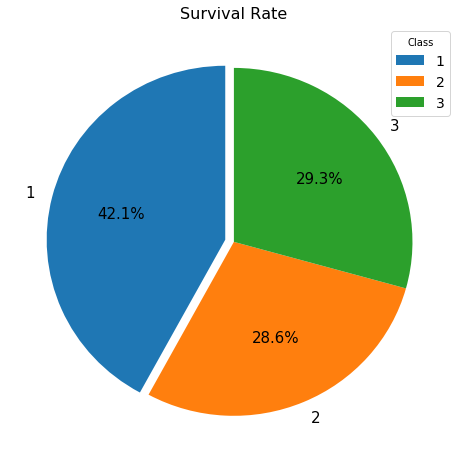

In [48]:
#Data Exploration
fig = plt.figure()
ax = fig.add_subplot(111)
titanic_df.groupby('Pclass').sum()['Survived'].plot.pie(
    figsize=(8,8), autopct = '%1.1f%%', startangle=90, fontsize=15, explode=(0.05, 0, 0))
ax.set_ylabel('')
ax.set_title('Survival Rate', fontsize=16)
ax.legend(labels=titanic_df['Pclass'].unique().sort(), loc="best", title="Class", fontsize=14)

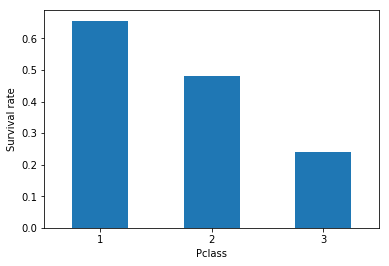

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel("Survival rate")
titanic_df.groupby("Pclass").mean()["Survived"].plot.bar()
ax.set_xticklabels(labels = ax.get_xticklabels(),rotation=0)

In [50]:
#So Passenger class is an important feature for survival rate. More passengers of 1st class survved

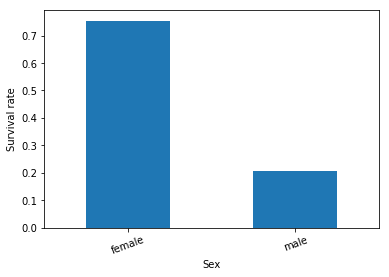

In [51]:
fig = plt.figure()
sorted_labes = [x for (y,x) in sorted(zip(sex_labels,sex_labelsE))]
ax = fig.add_subplot(111)
ax.set_ylabel("Survival rate")
titanic_df.groupby("Sex").mean()["Survived"].plot.bar()
ax.set_xticklabels(labels = sorted_labes,rotation=20)

In [52]:
#Female passengers have greater chance to survive

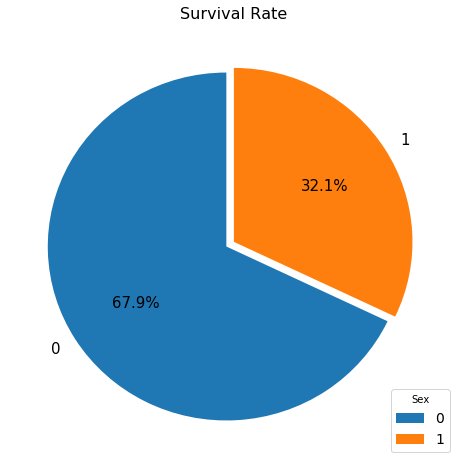

In [53]:
#Data Exploration
fig = plt.figure()
ax = fig.add_subplot(111)
titanic_df.groupby('Sex').sum()['Survived'].plot.pie(
    figsize=(8,8), autopct = '%1.1f%%', startangle=90, fontsize=15, explode=(0.05, 0))
ax.set_ylabel('')
ax.set_title('Survival Rate', fontsize=16)
ax.legend(labels=titanic_df['Sex'].unique().sort(), loc="best", title="Sex", fontsize=14)

In [54]:
#et's see plots with the relation between PClass and Sex for male and female for all the classes

In [55]:
index_name=titanic_df.groupby(["Pclass","Sex"]).mean()["Survived"].index.names
index_level=titanic_df.groupby(["Pclass","Sex"]).mean()["Survived"].index.levels
index_ = zip(index_name,index_level)

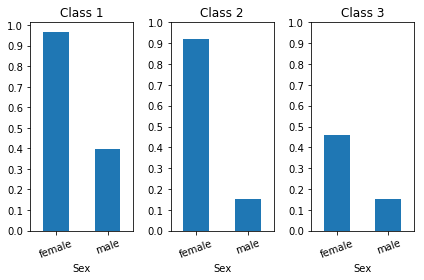

In [56]:
fig, axes = plt.subplots(nrows=1, ncols=3)
titanic_df.groupby(["Pclass","Sex"]).mean()["Survived"][1].plot.bar(ax=axes[0] )
titanic_df.groupby(["Pclass","Sex"]).mean()["Survived"][2].plot.bar(ax=axes[1] )
titanic_df.groupby(["Pclass","Sex"]).mean()["Survived"][3].plot.bar(ax=axes[2] )
axes[0].set_title('Class 1')
axes[0].set_xticklabels(labels = sorted_labes,rotation=20)
axes[0].set_yticks(np.arange(0.0,1.1,0.1))
axes[1].set_title('Class 2')
axes[1].set_xticklabels(labels = sorted_labes,rotation=20)
axes[1].set_yticks(np.arange(0.0,1.1,0.1))
axes[2].set_title('Class 3')
axes[2].set_xticklabels(labels = sorted_labes,rotation=20)
axes[2].set_yticks(np.arange(0.0,1.1,0.1))
fig.tight_layout()

In [57]:
#Now, let's see about ranges of ages grouped by 10 units
years_range = np.arange(0,90,10)

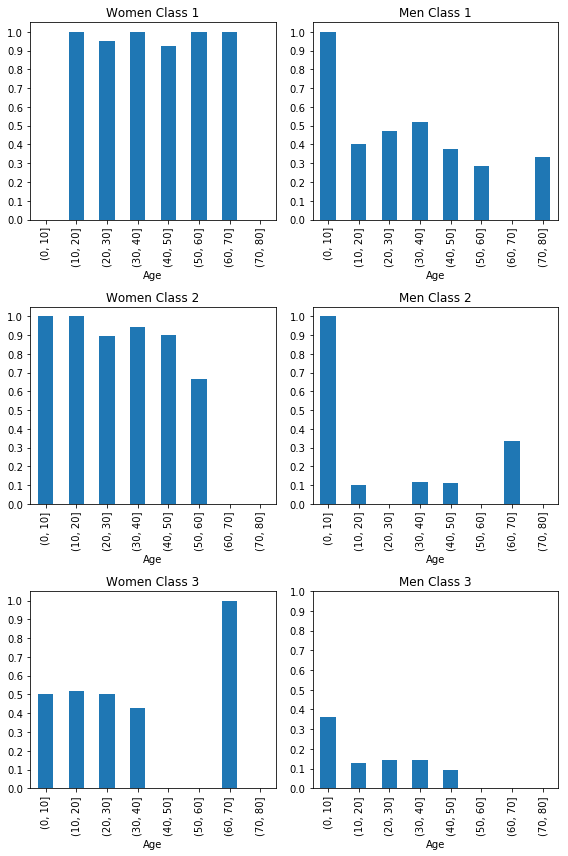

In [58]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,12))
titanic_df.groupby(by=["Pclass","Sex",pd.cut(titanic_df["Age"],years_range)]).mean()["Survived"][1,0].plot.bar(ax=axes[0,0], title = ("Women Class 1") )
titanic_df.groupby(by=["Pclass","Sex",pd.cut(titanic_df["Age"],years_range)]).mean()["Survived"][1,1].plot.bar(ax=axes[0,1], title = ("Men Class 1") )
titanic_df.groupby(by=["Pclass","Sex",pd.cut(titanic_df["Age"],years_range)]).mean()["Survived"][2,0].plot.bar(ax=axes[1,0], title = ("Women Class 2") )
titanic_df.groupby(by=["Pclass","Sex",pd.cut(titanic_df["Age"],years_range)]).mean()["Survived"][2,1].plot.bar(ax=axes[1,1], title = ("Men Class 2") )
titanic_df.groupby(by=["Pclass","Sex",pd.cut(titanic_df["Age"],years_range)]).mean()["Survived"][3,0].plot.bar(ax=axes[2,0], title = ("Women Class 3") )
titanic_df.groupby(by=["Pclass","Sex",pd.cut(titanic_df["Age"],years_range)]).mean()["Survived"][3,1].plot.bar(ax=axes[2,1], title = ("Men Class 3") )
axes[0,0].set_yticks(np.arange(0.0,1.1,0.1))
axes[0,1].set_yticks(np.arange(0.0,1.1,0.1))
axes[1,0].set_yticks(np.arange(0.0,1.1,0.1))
axes[1,1].set_yticks(np.arange(0.0,1.1,0.1))
axes[2,0].set_yticks(np.arange(0.0,1.1,0.1))
axes[2,1].set_yticks(np.arange(0.0,1.1,0.1))
fig.tight_layout()

In [59]:
#We can see some paterns like a female passenger had bigger survival rate in all the clases than male passengers. Also we see that children and older people had the same pattern. 
#Now let's check the others features

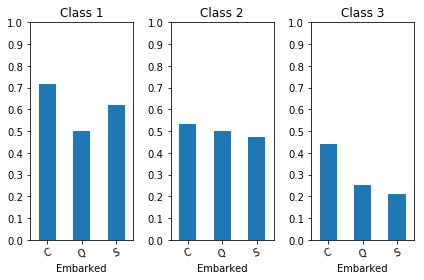

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=3)
sorted_labes = [x for (y,x) in sorted(zip(embark_labels,embark_labelsE))]
titanic_df.groupby(["Pclass","Embarked"]).mean()["Survived"][1].plot.bar(ax=axes[0] )
titanic_df.groupby(["Pclass","Embarked"]).mean()["Survived"][2].plot.bar(ax=axes[1] )
titanic_df.groupby(["Pclass","Embarked"]).mean()["Survived"][3].plot.bar(ax=axes[2] )
axes[0].set_title('Class 1')
axes[0].set_yticks(np.arange(0.0,1.1,0.1))
axes[0].set_xticklabels(labels = sorted_labes,rotation=20)
axes[1].set_title('Class 2')
axes[1].set_yticks(np.arange(0.0,1.1,0.1))
axes[1].set_xticklabels(labels = sorted_labes,rotation=20)
axes[2].set_title('Class 3')
axes[2].set_yticks(np.arange(0.0,1.1,0.1))
axes[2].set_xticklabels(labels = sorted_labes,rotation=20)
fig.tight_layout()

In [63]:
#There is a relation between the embarked port and the survival rate, but is not as bigger like Age and Sex

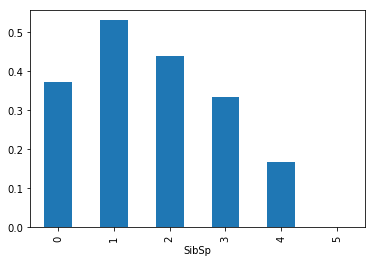

In [64]:
titanic_df.groupby("SibSp").mean()["Survived"].plot.bar()

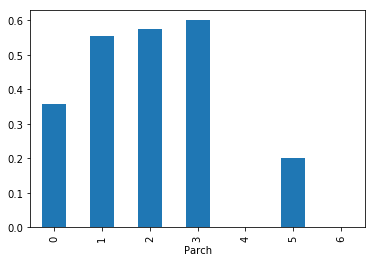

In [65]:
titanic_df.groupby("Parch").mean()["Survived"].plot.bar()

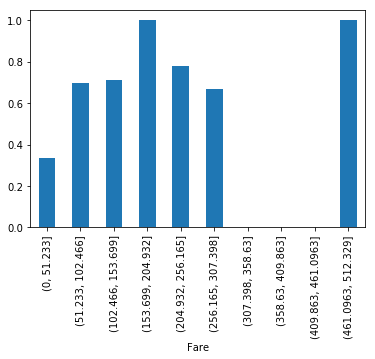

In [66]:
fare_ranges = np.arange(0,max(titanic_df.Fare)+1,max(titanic_df.Fare)/10)
titanic_df.groupby(pd.cut(titanic_df["Fare"],fare_ranges)).mean()["Survived"].plot.bar()

In [67]:
#Between SibSp, Parch, Fare there is no important correlation.

In [68]:
#Just to be sure, I will run a Random Forest Assesing Feature algorithm (A Feature Selection Algorithm) on the transformed features to asses if my chosed features

In [69]:
titanic_features = titanic_df.drop("Survived", axis=1)
feat_labels = titanic_df.columns[1:]

In [ ]:
from sklearn import ensemble
forest = ensemble.RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(titanic_features,titanic_df["Survived"])
importances = forest.feature_importances_
indices= np.argsort(importances)[::-1]
for f in range(titanic_features.shape[1]):
    print("%2d) %-*s %f" % (f+1, 30, feat_labels[f], importances[indices[f]]))